In [ ]:
# Group 29
# Assignment 3 | Author: Yash Kumar Sahu | Roll No: CED19I039 
# Assignment 3 | Author: Radhika Mittal | Roll No: CED19I050
# Assignment 3 | Author: Deep Patel | Roll No: ME21D0004

## Libraries


In [2]:
from matplotlib import pyplot as plt                                              
import cv2
import glob
import os
import numpy as np
import ntpath
import math


## Initialization

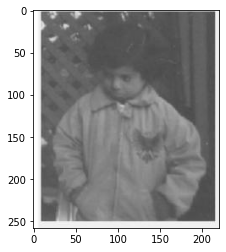

In [3]:
## if from colab
from urllib.request import urlopen
import cv2
import numpy as np
url = "https://raw.githubusercontent.com/DeepMechatronics/CS5102-Digital-Image-Processing-Assignment/master/Assignments/Assignment-5/pout-dark.jpg?token=GHSAT0AAAAAABRGXBN2YRJWDROG4RCTSU22YQHVKZQ"
url_response = urlopen(url)
img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
img_s = cv2.imdecode(img_array, -1)

plt.imshow(img_s[:, :, ::-1])


## get histogram

(258, 221, 3)
256


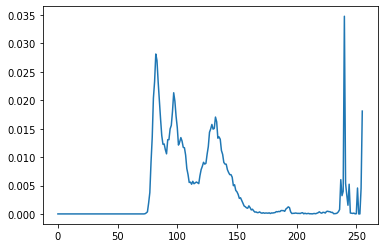

In [22]:
img_d=img_s*0 ## blank destination image size template
img_d_width=img_d.shape[1]
img_d_height=img_d.shape[0]
img_d_centre_X=img_d_width/2
img_d_centre_Y=img_d_height/2
fDistance=0
fPolarAngle=0
print(img_d.shape)
hg=[0]*256
print(len(hg))


for k in range(256):
    for i in range(img_d_height):  # scan across row or height
        for j in range(img_d_width): # scan across col or weidth
        ## convert raster to Cartesian
           if k==img_s[i][j][0]:
              hg[k]+=1

  
            
 
##plt.imshow(img_s[:, :, ::-1])
hg=np.array(hg)
p=hg/(img_d_width*img_d_height)
plt.plot(p)
        


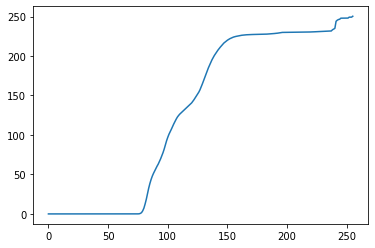

In [62]:
count=0
cpp=[0]*256
cpp=np.array(cpp,np.float)
pp=0
for i in range(1,256):  # scan across row or height
    cpp[i]=cpp[i-1]+p[i-1]
plt.plot(255*cpp)
    

## Image rotation code with Finding values from the source

(165, 305, 3)


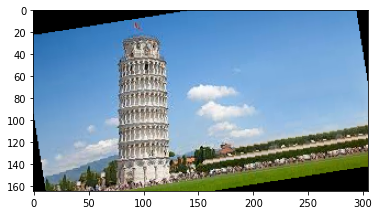

In [ ]:
img_d=img_s*0 ## blank destination image size template
img_d_width=img_d.shape[1]
img_d_height=img_d.shape[0]
img_d_centre_X=img_d_width/2
img_d_centre_Y=img_d_height/2
fDistance=0
fPolarAngle=0
print(img_d.shape)

for i in range(img_d_height):  # scan across row or height
    for j in range(img_d_width): # scan across col or weidth
        ## convert raster to Cartesian
        x = j - img_d_centre_X
        y = img_d_centre_Y - i
        ## convert Cartesian to polar
        fDistance = math.sqrt(x * x + y * y)
        fPolarAngle = 0.0
        if (x == 0):
        
            if (y == 0):
                ## centre of image, no rotation needed
                img_d[i,j]=img_s[i,j]
                continue
        
            elif (y < 0):
            
                fPolarAngle = 1.5 * math.PI
            
            else:
            
                fPolarAngle = 0.5 * math.PI
        else:
            fPolarAngle = math.atan2(y,x)  
        
        fPolarAngle -= cnAngle
        x = round(fDistance * math.cos(fPolarAngle))
        y = round(fDistance * math.sin(fPolarAngle))
        
        x = x + img_d_centre_X
        y = img_d_centre_Y - y

        if ((x < 0) or (x >= img_d_width) or (y < 0) or (y >= img_d_height)):
            continue
        ##print(i, j, x , y )
        ##img_d[math.floor(y),math.floor(x)]=img_s[i,j]
        img_d[i,j]=img_s[math.floor(y),math.floor(x)]

plt.imshow(img_d[:, :, ::-1])

## Image rotation code with bilinear interpolation

(165, 305, 3)


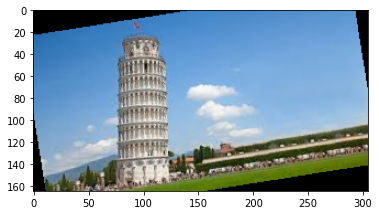

In [ ]:
img_d=img_s*0 ## blank destination image size template
img_d_width=img_d.shape[1]
img_d_height=img_d.shape[0]
img_d_centre_X=img_d_width/2
img_d_centre_Y=img_d_height/2
fDistance=0
fPolarAngle=0
print(img_d.shape)

for i in range(img_d_height):  # scan across row or height
    for j in range(img_d_width): # scan across col or weidth
        ## convert raster to Cartesian
        x = j - img_d_centre_X
        y = img_d_centre_Y - i
        ## convert Cartesian to polar
        fDistance = math.sqrt(x * x + y * y)
        fPolarAngle = 0.0
        if (x == 0):
        
            if (y == 0):
                ## centre of image, no rotation needed
                img_d[i,j]=img_s[i,j]
                continue
        
            elif (y < 0):
            
                fPolarAngle = 1.5 * math.PI
            
            else:
            
                fPolarAngle = 0.5 * math.PI
        else:
            fPolarAngle = math.atan2(y,x)  
        
        fPolarAngle -= cnAngle
        ## convert polar to Cartesian
        x = fDistance * math.cos(fPolarAngle)
        y = fDistance * math.sin(fPolarAngle)

        ## convert Cartesian to raster
        x = x + img_d_centre_X
        y = img_d_centre_Y - y
        
        #finding neighbours index
        x1 = math.floor(x)
        y1 = math.floor(y)
        x2 = math.ceil(x)
        y2 = math.ceil(y)
            
        if ((x1 < 0) or (x1 >= img_d_width) or (y1 < 0) or (y1 >= img_d_height) or (x2 < 0) or (x2 >= img_d_width) or (y2 < 0) or (y2 >= img_d_height)):
            continue

        #Original pixel values
        a=img_s[y1,x1]
        b=img_s[y1,x2]
        c=img_s[y2,x1]
        d=img_s[y2,x2]

        pixel=(x2-x)*(y2-y)*a + (x-x1)*(y2-y)*b + (x2-x)*(y-y1)*c + (x-x1)*(y-y1)*d

        
        ##print(i, j, x , y )
        ##img_d[math.floor(y),math.floor(x)]=img_s[i,j]
        pixel=np.array(pixel)
        pixel=pixel.astype(np.uint8)
        img_d[i,j]=pixel

plt.imshow(img_d[:, :, ::-1])

## References:


http://polymathprogrammer.com/2008/10/06/image-rotation-with-bilinear-interpolation/